## Modéle de prévision des maladies cardiovasculaire

Dans ce cas nous devons devellopper un modèle de classification pour predire la maldie cardivasculaire


### **1- Importation des packages nécéssaires**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

### **2 - Importion de la base de données**

In [ ]:
data = pd.read_csv("/content/data.csv")
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


### 3 - **Pretraitement de la base de donnée**

In [ ]:
# On va donner les vrais noms des colonne
data.columns = ["age", "sex", "cp","tresrbps", "chol","fbs", "restecg",
                  "thalach", "exang", "oldpeak","sloppe", "ca", "thal","target"]
data.columns

Index(['age', 'sex', 'cp', 'tresrbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'sloppe', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
# La dimension de la base de données
data.shape

(303, 14)

In [ ]:
data.head(10)

,age,sex,cp,tresrbps,chol,fbs,restecg,thalach,exang,oldpeak,sloppe,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
7,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
8,63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2
9,53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0,1


In [ ]:
# Tranformation de la collone target en ne gardant que des 0 et 1
data.target.unique()
data.target = data.target.replace([2,3,4], 1)
data.head()

,age,sex,cp,tresrbps,chol,fbs,restecg,thalach,exang,oldpeak,sloppe,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [ ]:
# Cherchons les colonnes qui ont des valeurs manquantes
data.isnull().sum()
# En regardant avec la façon de isnull on voit que notre base de donnée ne contient aucune
# Valeur manquante, mais en réalité, elle contient des valeurs manquantes en fouillant
# On voit que notre jeu de données contient quelques points d'interogation

,0
age,0
sex,0
cp,0
tresrbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
# On va verifier les colonne qui contiennent des points d'interogations
data_valeurs_Manquante =   [col for col in data.columns if (data[col] == "?").any()]
data_valeurs_Manquante
# On va verifier les ligne de la colonne "ca" du jeu de données qui contients les points d'interogation
data.loc[data.ca =="?"]

,age,sex,cp,tresrbps,chol,fbs,restecg,thalach,exang,oldpeak,sloppe,ca,thal,target
166,52,1,3,138,223,0,0,169,0,0.0,1,?,3.0,0
192,43,1,4,132,247,1,2,143,1,0.1,2,?,7.0,1
287,58,1,2,125,220,0,0,144,0,0.4,2,?,7.0,0
302,38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


In [ ]:
# Étape 1 : indices où 'ca' == '?'
valeurs_manquante_ca = data.index[data['ca'] == '?']

# Étape 2 : indices où 'thal' == '?'
valeurs_manquante_thal = data.index[data['thal'] == '?']

# Étape 3 : combiner les indices
valeurs_manquantes = valeurs_manquante_ca.union(valeurs_manquante_thal)

# Étape 4 : supprimer les lignes correspondantes
data = data.drop(index=valeurs_manquantes)
data.shape

(297, 14)

Maintenant que nous avons  traiter le probléme des valeurs manquantes nous allons traiter les types de variables

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   tresrbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  sloppe    297 non-null    int64  
 11  ca        297 non-null    object 
 12  thal      297 non-null    object 
 13  target    297 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 34.8+ KB


In [ ]:
# Transformation des variables qualitatives en facteur, car elles sont considerer ici comme des int
data.sex = data.sex.astype('category')
data.cp = data.cp.astype('category')
data.sloppe = data.sloppe.astype('category')
data.fbs = data.fbs.astype('category')
data.restecg = data.restecg.astype('category')
data.exang = data.exang.astype('category')
data.ca = data.ca.astype('category')
data.target = data.target.astype('category')
data.thal = data.thal.astype('category')

In [ ]:
## Transformation des variables qui ne possedent pas de virgule en entier,  C'est-à-dire les variables quantitatives
## quant une variable est de type num, cela veut dire que c'est un float
data.age = data.age.astype('int')
data.tresrbps = data.tresrbps.astype('int')
data.chol = data.chol.astype('int')
data.thalach = data.thalach.astype('int')
data.oldpeak = data.oldpeak.astype('float')

In [ ]:
# Recodage des des modalités des variables qualitatives
# Recodage des des modalités des variables qualitatives
data['sex'] = data['sex'].cat.rename_categories(["Femme", "Homme"])
data['cp'] = data['cp'].cat.rename_categories(["engine stable", "engine instable", "Autre douleur", "Asymptomatique"])
data['fbs'] = data['fbs'].cat.rename_categories(["Non", "Oui"])
data['restecg'] = data['restecg'].cat.rename_categories(["Normal", "Anomalie", "Hypertrophie"])
data['exang'] = data['exang'].cat.rename_categories(["Non", "Oui"])
data['sloppe'] = data['sloppe'].cat.rename_categories(["En hausse", "Stable", "En baisse"])
data['ca'] = data['ca'].cat.rename_categories(["Absence d'anomalie", "Faible", "Moyen", "Elevé"])
data['thal'] = data['thal'].cat.rename_categories(["Non", "Thalasemie sous control", "Thalasemie instable"])

### 4 - **Calcul des indicateurs clés**

a- Variables qualitatives

In [ ]:
data.sex.value_counts()
prop = data.sex.value_counts(normalize=True)*100 # Calcul des pourcentage
prop_arrondi = prop.round(4)
prop_arrondi


,proportion
sex,
Homme,67.6768
Femme,32.3232


In [ ]:
data.cp.value_counts()
prop = data.cp.value_counts(normalize=True)*100 # Calcul des pourcentage
prop_arrondi = prop.round(4)
#prop_arrondi


In [ ]:
data.fbs.value_counts()
prop = data.fbs.value_counts(normalize=True)*100 # Calcul des pourcentage
prop_arrondi = prop.round(4)
#prop_arrondi

In [ ]:
data.fbs.value_counts()
prop = data.fbs.value_counts(normalize=True)*100 # Calcul des pourcentage
prop_arrondi = prop.round(4)
#prop_arrondi


 b - Calcul des indicateurs clés (Variables quantitatives)
  Moyenne, mediane, quartile, minimum, maximum

In [ ]:
data[["age", "chol", "tresrbps", "thalach"]].describe()

,age,chol,tresrbps,thalach
count,297.000000,297.000000,297.000000,297.000000
mean,54.542088,247.350168,131.693603,149.599327
std,9.049736,51.997583,17.762806,22.941562
min,29.000000,126.000000,94.000000,71.000000
25%,48.000000,211.000000,120.000000,133.000000
50%,56.000000,243.000000,130.000000,153.000000
75%,61.000000,276.000000,140.000000,166.000000
max,77.000000,564.000000,200.000000,202.000000


Calcul de la variance et l'ecart-type


In [ ]:
np.var(data.age)
np.std(data.age)


9.03448758992664

Nous constatons que notre ecartype est vraiment éloigné de 0 ce que nos données ne sont pas proche de la mayenne car, un ecart type proche de 0 indique que les données sont proche de la moyenne.

### V- **Analyse  Graphique Univariée**

6 - Diagramme en barre variable qualitatives

In [ ]:
# Variable SEXE
Valeur_sex = data.sex.value_counts()
categorie =Valeur_sex.index
Nombre = Valeur_sex.values

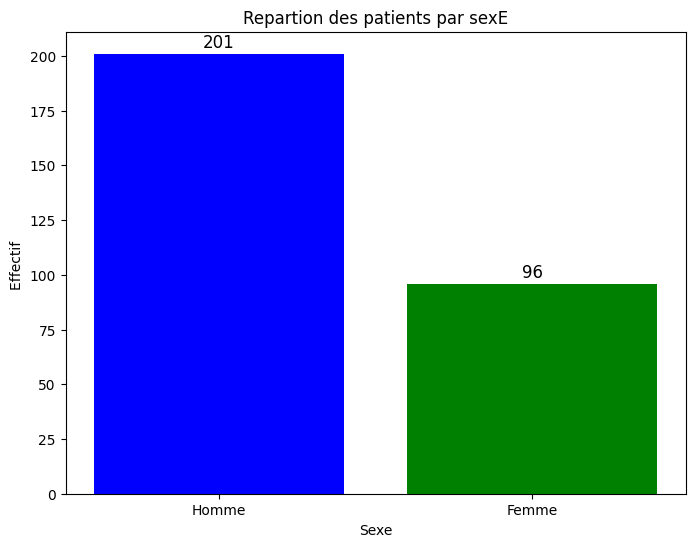

In [ ]:
plt.figure(figsize=(8, 6))
couleurs = ['blue', 'green']  # Couleurs compréhensibles
plt.bar(categorie,  Nombre, color = couleurs)
plt.xlabel('Sexe')
plt.ylabel('Effectif ')
plt.title('Repartion des patients par sexE')

for i, v in enumerate(Nombre):
    plt.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=12, color='black')
plt.show()

In [ ]:
# Variable CP
Valeur_cp = data.cp.value_counts()
categorie_cp =Valeur_cp.index
Nombre_cp = Valeur_cp.values

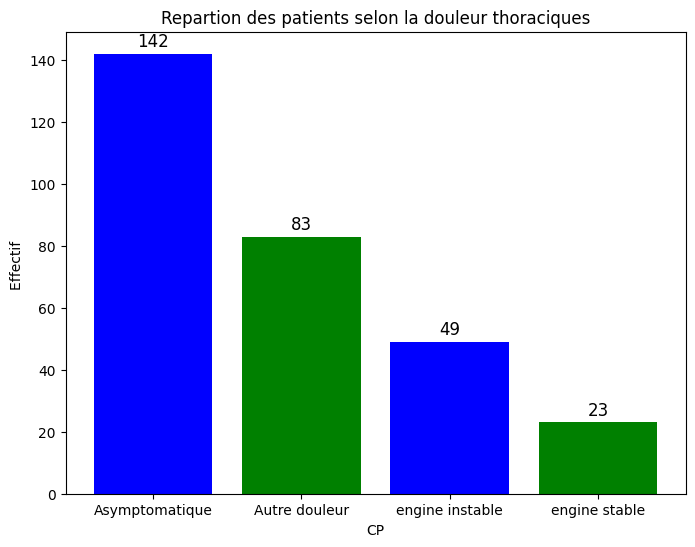

In [ ]:
plt.figure(figsize=(8, 6))
couleurs = ['blue', 'green']  # Couleurs compréhensibles
plt.bar(categorie_cp,  Nombre_cp, color = couleurs)
plt.xlabel('CP')
plt.ylabel('Effectif ')
plt.title('Repartion des patients selon la douleur thoraciques')

for i, v in enumerate(Nombre_cp):
    plt.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=12, color='black')
plt.show()

7 - Boxplot Variables quantitatives

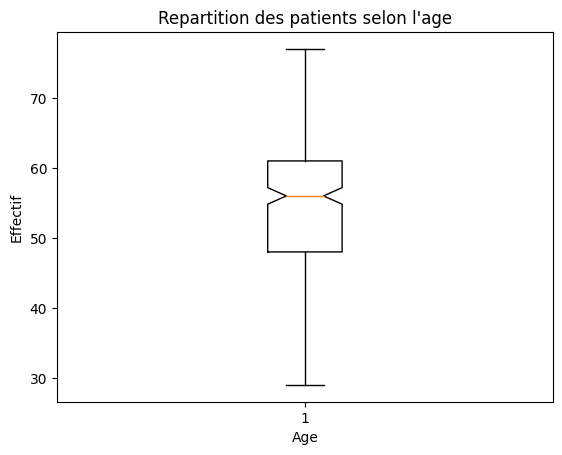

In [ ]:
plt.boxplot(data.age, notch=True)
plt.xlabel('Age') # notch=True permet de mettre en valeur la madiane
plt.ylabel('Effectif')
plt.title("Repartition des patients selon l'age")
plt.show()

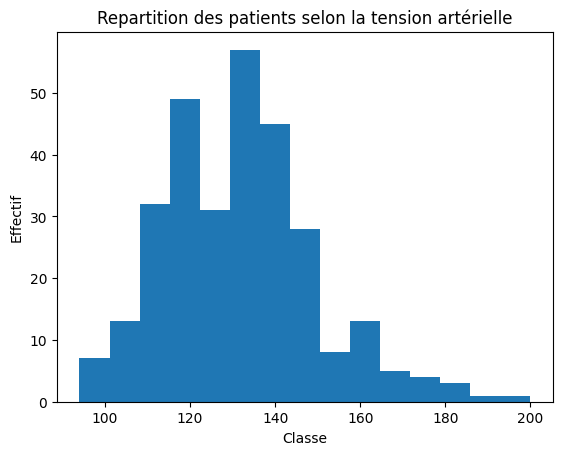

In [ ]:
# Maintenant nous allons effectuer un histogramme de quelques variables quantitatives
plt.hist(data.tresrbps, bins = 15)
plt.xlabel("Classe")
plt.ylabel("Effectif")
plt.title("Repartition des patients selon la tension artérielle")
plt.show()

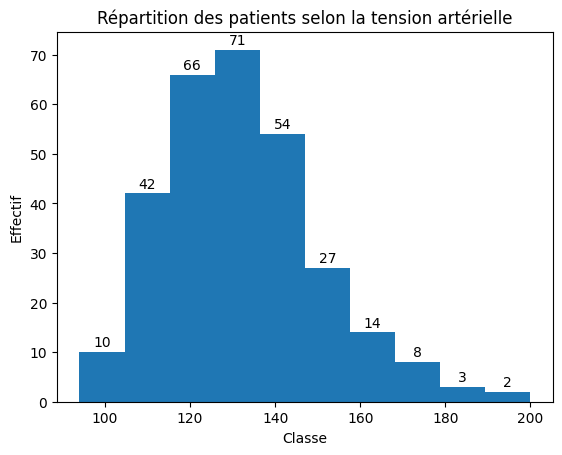

In [ ]:
# Création de l'histogramme et récupération des valeurs
counts, bins, patches = plt.hist(data.tresrbps)

# Calcul du centre de chaque barre
bin_centers = 0.5 * (bins[1:] + bins[:-1])

# Ajout des étiquettes (les effectifs) au-dessus des barres
for count, x in zip(counts, bin_centers):
    plt.text(x, count + 0.5, str(int(count)), ha='center', va='bottom')

# Titres et étiquettes des axes
plt.xlabel("Classe")
plt.ylabel("Effectif")
plt.title("Répartition des patients selon la tension artérielle")

# Affichage
plt.show()

## **VI- Graphiques croisés (Analyse bivarié)**

#### Diagramme à barres croisés (deux variable qualitatives)


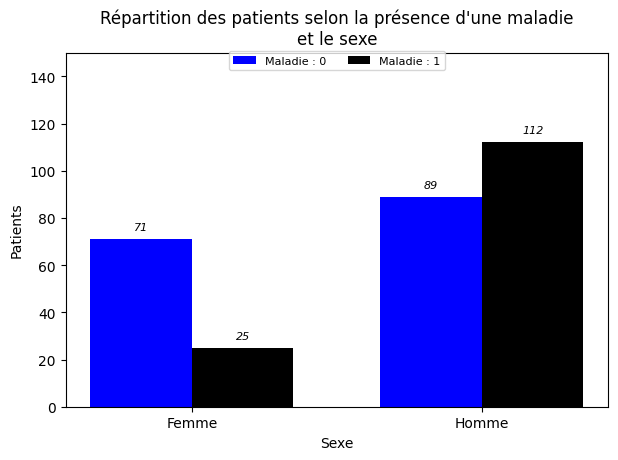

In [ ]:


# Table de contingence
counts = pd.crosstab(data['target'], data['sex'])

# Positionnement
bar_width = 0.35
x = np.arange(len(counts.columns))  # positions des sexes (0, 1)

# Création de la figure (hauteur augmentée)
fig, ax = plt.subplots(figsize=(7, 6))
colors = ['blue', 'black']

# Barres groupées
for i, (label, row) in enumerate(counts.iterrows()):
    ax.bar(x + i * bar_width, row.values, width=bar_width,
           label=f"Maladie : {label}", color=colors[i])

# Axes
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(counts.columns)
ax.set_xlabel("Sexe")
ax.set_ylabel("Patients")
ax.set_title("Répartition des patients selon la présence d'une maladie\net le sexe")
ax.set_ylim(0, 150)

# ✅ Légende propre, centrée, avec espace
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.02), ncol=2, fontsize=8)

# Étiquettes au-dessus des barres
for i, (label, row) in enumerate(counts.iterrows()):
    for j, value in enumerate(row.values):
        ax.text(x[j] + i * bar_width, value + 3, str(value),
                ha='center', va='bottom', fontsize=8, fontstyle='italic')

# ✅ Ajustement du layout pour laisser la place à la légende
plt.subplots_adjust(top=0.7)  # ↓ change cette valeur si besoin
plt.show()


En regardant ce graphique on voit nettement que le sexe a un effet significatif sur la maladie cardiovasculaire, car la maladie touche plus les femmmes que les hommes

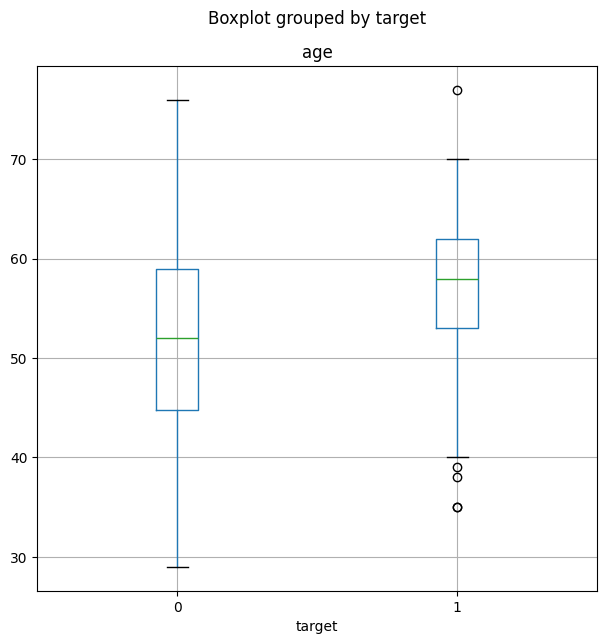

In [ ]:

data.boxplot(column= 'age', by='target', figsize= (7,7));
plt.show()

 Pour l'analyse de ces boxplot nous constatons que pour les patients qui ne sont pas malade l'age médian est 52 environs et pour les patients qui sont malades
l'age median est de 58 environs, juste en se basant sur ça on sait que  l'age a un impact significatif sur la présence ou non de la maladie car
les deux mediane ne sont pas les memes
A travers la boite a moustache aussi on voit que le patient le plus
 jeune n'a pas la maladie et d'ailleur meme le plus agé n'a pas la maladie

### **VII Tests Statistiques**

#### Calcul des pourcentage

In [ ]:
# Maintenant nous allons créer une fonction qui va nous calculer les proportions
def proportion_table(var):
  # Use the variable 'var' to access the column, not the literal string 'var'
  contegency = pd.crosstab(data[var], data['target'])
  row_percentages = contegency.div(contegency.sum(axis=1), axis=0)
  result = (row_percentages * 100).round(4)
  return result
# %%
# Maintenant nous allons appliquer cette fonction sur les variables qualitatives
for var in ['cp', 'fbs', 'restecg', 'exang', 'sex']:
    print(f"Proportions pour '{var}' vs target (%):\n")
    print(proportion_table(var), "\n")

Proportions pour 'cp' vs target (%):

target                 0        1
cp                               
engine stable    69.5652  30.4348
engine instable  81.6327  18.3673
Autre douleur    78.3133  21.6867
Asymptomatique   27.4648  72.5352 

Proportions pour 'fbs' vs target (%):

target        0        1
fbs                     
Non     53.9370  46.0630
Oui     53.4884  46.5116 

Proportions pour 'restecg' vs target (%):

target              0        1
restecg                       
Normal        62.5850  37.4150
Anomalie      25.0000  75.0000
Hypertrophie  45.8904  54.1096 

Proportions pour 'exang' vs target (%):

target        0        1
exang                   
Non     68.5000  31.5000
Oui     23.7113  76.2887 

Proportions pour 'sex' vs target (%):

target        0        1
sex                     
Femme   73.9583  26.0417
Homme   44.2786  55.7214 



Dans le cas de la variable Sexe :
On voit que les **Hommes** ont **55.72%** d'avoir la maladie cardiavasculaire par rapport
 aux **Femmes** qui n'ont que **26.04%**

## **Test de khi-2 (Variable qualitatives)**

### H_0 : Les deux variables sont indépendantes
### H_1 : Les deux variables sont dépendantes
### C'est un test qui se fait uniquement pour deux variables qualitatives

In [ ]:
from scipy.stats import chi2_contingency

# Créer une table de contingence

contingency_table = pd.crosstab(data['sex'], data['target'])

# Appliquer le test du chi carré

chi2, p, dof, expected = chi2_contingency(contingency_table)

# Afficher les résultats

print("Statistique du chi² :", chi2)
print("Degrés de liberté    :", dof)
print("Valeur p             :", p)
#print("Fréquences attendues :\n", expected)

Statistique du chi² : 21.851612168613475
Degrés de liberté    : 1
Valeur p             : 2.945690038078843e-06


Les résultats donne une **p-value** de **2.946e-06** donc les deux variables sont dependantes, autrement dit le **sexe** a une influence sur la presence de la maladie.

In [ ]:
moyenne_par_target = data.groupby('target',  observed=False)['age'].mean()
print(moyenne_par_target)

target
0    52.643750
1    56.759124
Name: age, dtype: float64


## Test de shapiro wilk

In [ ]:
from scipy.stats import shapiro

# Filtrer les données où target == 'Oui'
subset = data[data['target'] == 1]

# Test de Shapiro-Wilk sur 'age'
stat_age, p_age = shapiro(subset['age'])
print("Shapiro-Wilk test pour 'age' (target = 'Oui'):")
print("Statistique :", stat_age)
print("p-value     :", p_age, "\n")

# Test de Shapiro-Wilk sur 'thalach'
stat_thalach, p_thalach = shapiro(subset['thalach'])
print("Shapiro-Wilk test pour 'thalach' (target = 'Oui'):")
print("Statistique :", stat_thalach)
print("p-value     :", p_thalach)

Shapiro-Wilk test pour 'age' (target = 'Oui'):
Statistique : 0.9659026448046826
p-value     : 0.001669977457563826 

Shapiro-Wilk test pour 'thalach' (target = 'Oui'):
Statistique : 0.9896720933734133
p-value     : 0.40525912923895985


Pour la variable **Age** on voit que les données ne suivent pas la loi normale, car la **p-value** est inférieure à **5%**
Tandisque pour la variable **thalach**, on voit bien que les données suivent la loi normale car on a une **p-value** supérieure à **5%**

Dans le cas de la variable Age vu que les données ne suivent pas la loi normale on voit faire un test non paramétrique.


### Test de Mann -Whitney (Test non parametrique en cas de non normalité)
#### H_0 : Il n'y a pas de difference significative entre  la moyenne des variables
#### H_1 : Il y a  une difference significative entre  la moyenne des variables


In [ ]:
from scipy.stats import mannwhitneyu

# Comparer 'age' entre les deux groupes définis par target = 0 et target = 1
group0 = data[data['target'] == 0]['age']
group1 = data[data['target'] == 1]['age']

# Test de Mann–Whitney U
stat, p = mannwhitneyu(group0, group1, alternative='two-sided')

print("Statistique de Mann–Whitney U :", stat)
print("p-value                        :", p)

Statistique de Mann–Whitney U : 7916.5
p-value                        : 3.672541004211365e-05


On trouve une p-value inférieur à 5% donc on réjette l'hypothése nulle, cela veut dire que on a une difference signficative entre la moyenne d'age dans les deux groupes.

## Test de student (Quand les données suivent la loi normale)
Dans le cas de la variable **thalach**, on voit que les données suivent effectivement une loi normale donc on va faire un test paramétriques. Dans le cas le test qui correspond à ça c'est le test de **student**.

#### H_0 : Il n'y a pas de difference significative entre  la moyenne des variables
#### H_1 : Il y a  une difference significative entre  la moyenne des variables

In [ ]:
from scipy.stats import ttest_ind

# Extraire les deux groupes
group0 = data[data['target'] == 0]['thalach']
group1 = data[data['target'] == 1]['thalach']

# Test t de Student pour échantillons indépendants
stat, p = ttest_ind(group0, group1, equal_var=False)

print("Statistique t :", stat)
print("p-value       :", p)

Statistique t : 7.928642817035473
p-value       : 6.107938033603319e-14


Dans ce cas on voit que les résultats du test de student montre une p-value inférieur à 5% donc on va réjéter l'hypothése nulle.

## Machine Learning (Regression logistique)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Convertir les variables qualitatives en variables binaires (one-hot encoding)
# Nous excluons la colonne 'target' car c'est notre variable cible
data_encoded = pd.get_dummies(data.drop('target', axis=1))

X = data_encoded  # Variables explicatives encodées
y = data['target']              # Variable cible (0 ou 1)

# 2. Diviser en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Créer et entraîner le modèle
model = LogisticRegression(max_iter=2000)  # augmenter max_iter si convergence difficile
model.fit(X_train, y_train)

# 4. Prédire sur l’ensemble de test
y_pred = model.predict(X_test)

# 5. Évaluer les performances
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred))
print("\nRapport de classification :\n", classification_report(y_test, y_pred))
print("Exactitude :", accuracy_score(y_test, y_pred))

Matrice de confusion :
 [[30  6]
 [ 4 20]]

Rapport de classification :
               precision    recall  f1-score   support

           0       0.88      0.83      0.86        36
           1       0.77      0.83      0.80        24

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.84      0.83      0.83        60

Exactitude : 0.8333333333333334


In [ ]:
# 5. Prédiction des probabilités
y_proba = model.predict_proba(X_test)[:, 1]  # Probabilité d'appartenance à la classe 1

# 6. Application du seuil de 0.5
y_pred_thresholded = (y_proba > 0.5).astype(int)


In [ ]:
# Création d'un tableau de comparaison simple
comparaison = pd.DataFrame({
    'Valeur réelle': y_test.values,
    'Probabilité prédite': y_proba,
    'Valeur prédite': y_pred_thresholded
})
# Optionnel : transformer 0/1 en 'Non'/'Oui' pour lisibilité
comparaison['Valeur réelle'] = comparaison['Valeur réelle'].map({0: 'Non', 1: 'Oui'})
comparaison['Valeur prédite'] = comparaison['Valeur prédite'].map({0: 'Non', 1: 'Oui'})
comparaison

,Valeur réelle,Probabilité prédite,Valeur prédite
0,Non,0.037527,Non
1,Oui,0.492148,Non
2,Non,0.005827,Non
3,Oui,0.973463,Oui
4,Non,0.075396,Non
5,Non,0.417916,Non
6,Non,0.149735,Non
7,Non,0.590525,Oui
8,Oui,0.842164,Oui
9,Non,0.169771,Non


Je peux ajouter ce tableau au tableau suivant mais par souci de lisibilité je prepare les séparés car le tableau précédent seulement me suffit pour avoir ce que je veux.

In [ ]:

# Ajouter une colonne pour indiquer si la prédiction est correcte ou non
# comparaison['Erreur'] = comparaison['Valeur réelle'] != comparaison['Valeur prédite']
# Afficher les erreurs uniquement (mauvaises prédictions)
#erreurs = comparaison[comparaison['Erreur'] == True]

# Affichage
print("\n🔍 Comparaison complète (réel vs prédiction) :")
print(comparaison.head(10))  # Affiche les 10 premières lignes

#print("\n❌ Erreurs de prédiction :")
#print(erreurs)

## Courbe ROC pour voir la performance du modéle

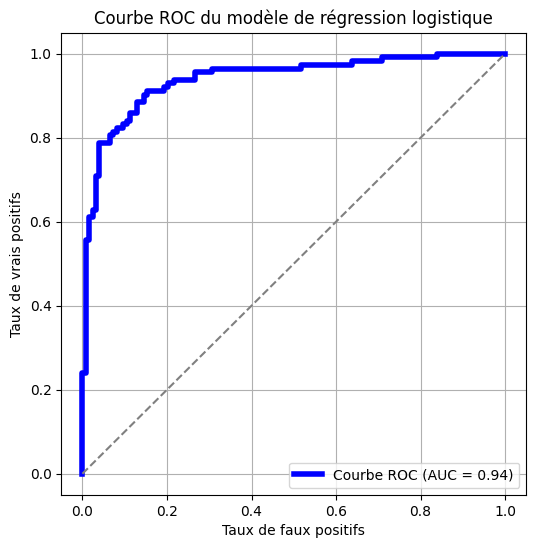

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 1. Prédire les probabilités sur les données d'entraînement
y_train_proba = model.predict_proba(X_train)[:, 1]

# 2. Calculer les points de la courbe ROC
fpr, tpr, thresholds = roc_curve(y_train, y_train_proba) # thresholds signifie Seuil

# 3. Calcul de l'AUC
roc_auc = auc(fpr, tpr)

# 4. Tracer la courbe ROC
plt.figure(figsize=(6, 6))  # carré
plt.plot(fpr, tpr, color='blue', lw=4, label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonale (modèle aléatoire)
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC du modèle de régression logistique')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


En regardant notre **courbe ROC** on voit que notre modéle a une bonne performance, car l'aire sur la courbe est vraiment proche de 1 car elle est de **0,94**.